In [17]:
# Parameters
nuclei_file = "Red opsin/2024-9-21/Red-pcdh15.tif"
# puncta_stats_file = "Red opsin/2024-9-21/Statistics for C3-Red-pcdh15.oib - Series 1.csv"
puncta_stats_file = "Red opsin/2024-9-21/C3-Red-pcdh15.oib - Series 1.tif"
mask_file = "Red opsin/2024-9-21/Red-pcdh15-do_3D_True-diameter_20-normalize_{'sharpen_radius': 0, 'normalize': True, 'percentile': [1, 99], 'tile_norm_blocksize': 50, 'norm3D': False}.tif"
volume_min = 1000
volume_max = 20000
boundaries = [200,300,600]
puncta_volume_min = 10
nuclear_expansion = 0

In [18]:
# # Parameters
# nuclei_file = "Red opsin/2024-9-21/Red-pcdh15-2.tif"
# puncta_file = "Red opsin/2024-9-21/Red-pcdh15-2_puncta.tif"
# mask_file = "Red opsin/2024-9-21/Red-pcdh15-2-do_3D_True-diameter_20-normalize_{'sharpen_radius': 0, 'normalize': True, 'percentile': [1, 99], 'tile_norm_blocksize': 50, 'norm3D': False}.tif"
# volume_min = 1000
# volume_max = 20000
# boundaries = [200,300,600]
# puncta_volume_min = 10
# nuclear_expansion = 0

In [19]:
# # Parameters
# nuclei_file = "Red opsin/2024-9-21/Red-pcdh15.tif"
# puncta_stats_file = "Red opsin/2024-9-21/Statistics for C3-Red-pcdh15.oib - Series 1.csv"
# mask_file = "Red opsin/2024-9-21/Red-pcdh15-do_3D_True-diameter_20-normalize_{'sharpen_radius': 0, 'normalize': True, 'percentile': [1, 99], 'tile_norm_blocksize': 50, 'norm3D': False}.tif"
# volume_min = 1000
# volume_max = 20000
# boundaries = [200,300,600]
# puncta_volume_min = 10
# nuclear_expansion = 0

In [20]:
# Imports 
# from cellpose import models
# import tifffile as tiff
# import numpy as np
# import sys
# import matplotlib.pyplot as plt
# from skimage import measure
# from skimage import io
# from skimage.measure import label, regionprops
# import os
# from cellpose import utils
from ImageFunctions import *
import pandas as pd

path = os.path.dirname(nuclei_file)
basename = os.path.basename(nuclei_file)
prefix = os.path.splitext(basename)[0]
summary_output_file = path + '/' + prefix + '_quantification.csv'
puncta_file = path + '/' + prefix + '_filt_puncta.tif'
print('Output will be in :', summary_output_file)

Output will be in : Red opsin/2024-9-21/Red-pcdh15_quantification.csv


# Check cellpose segmentation

Z-stack loaded successfully with shape (82, 864, 1024)


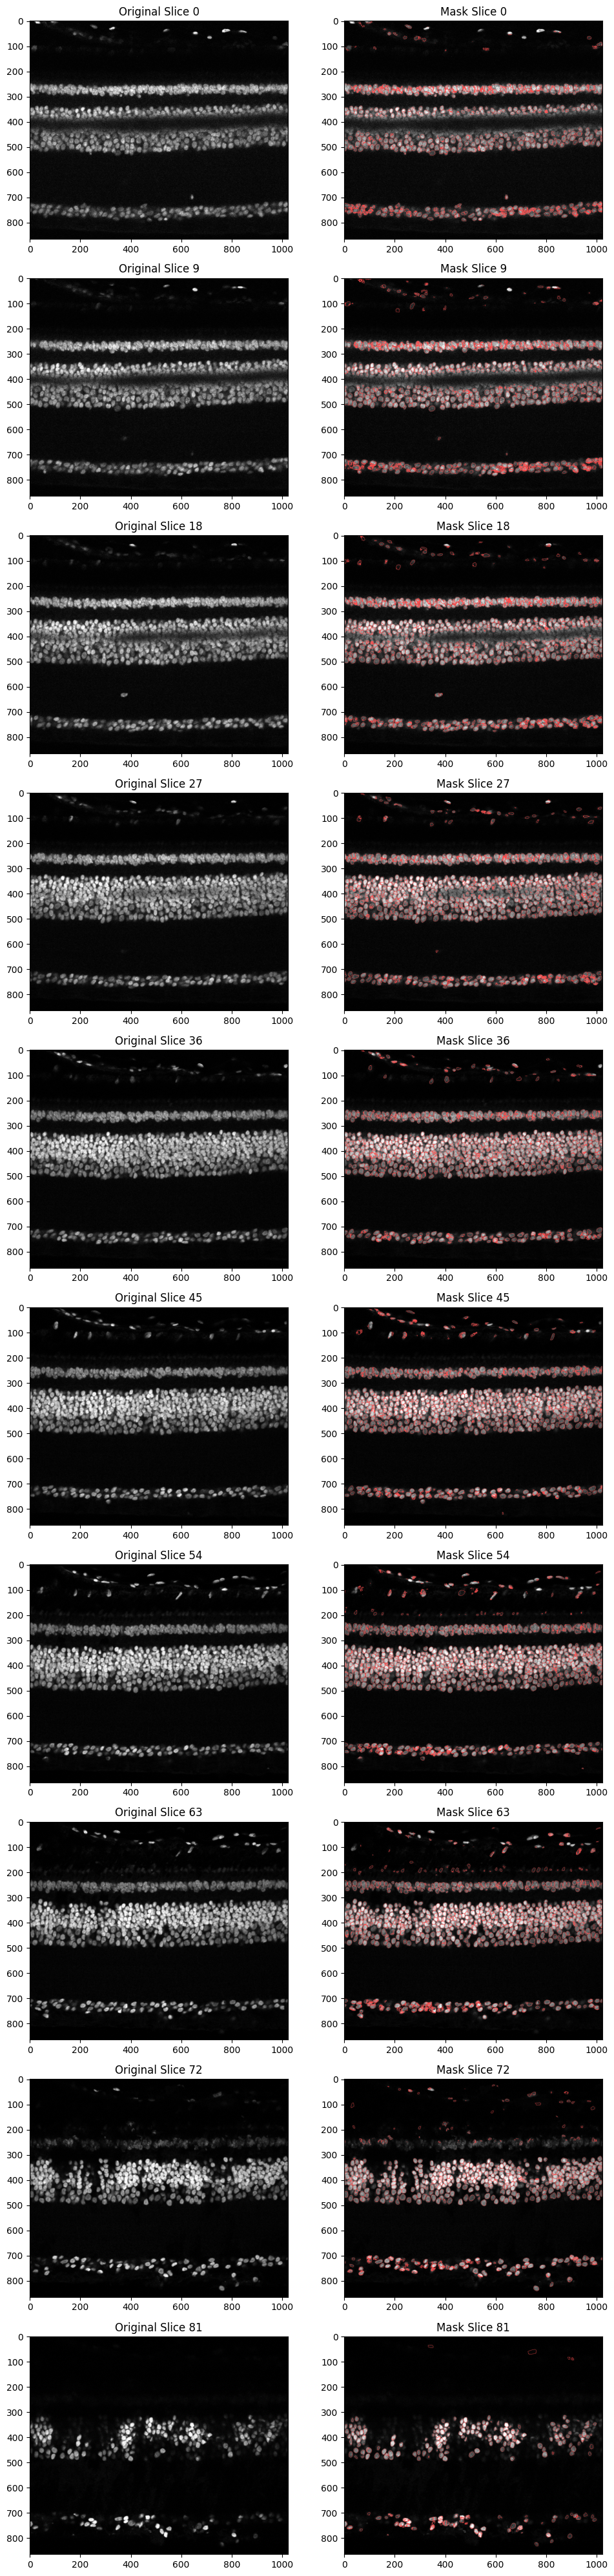

In [21]:
# enhance contrast on each slice in Fiji first
check_masks(nuclei_file, mask_file)


# Puncta counting

Found  1550  puncta
  Region 1:
  Label: 1
  Area: 30.0
  Centroid: (2.3, 253.1, 120.36666666666666)
  Bounding Box: (0, 252, 119, 6, 255, 123)

  Region 2:
  Label: 2
  Area: 25.0
  Centroid: (2.12, 253.32, 591.56)
  Bounding Box: (0, 252, 590, 5, 255, 595)

  Region 3:
  Label: 3
  Area: 14.0
  Centroid: (1.5714285714285714, 253.85714285714286, 745.8571428571429)
  Bounding Box: (0, 253, 745, 4, 256, 748)

  Region 4:
  Label: 4
  Area: 39.0
  Centroid: (2.58974358974359, 262.0, 699.5128205128206)
  Bounding Box: (0, 260, 698, 6, 265, 703)

  Region 5:
  Label: 5
  Area: 40.0
  Centroid: (2.025, 261.3, 832.075)
  Bounding Box: (0, 259, 831, 5, 264, 835)

  Region 6:
  Label: 6
  Area: 30.0
  Centroid: (2.2666666666666666, 266.46666666666664, 863.3333333333334)
  Bounding Box: (0, 265, 862, 6, 269, 866)

  Region 7:
  Label: 7
  Area: 18.0
  Centroid: (1.6666666666666667, 268.94444444444446, 845.0555555555555)
  Bounding Box: (0, 268, 844, 4, 271, 847)

  Region 8:
  Label: 8
  Area: 

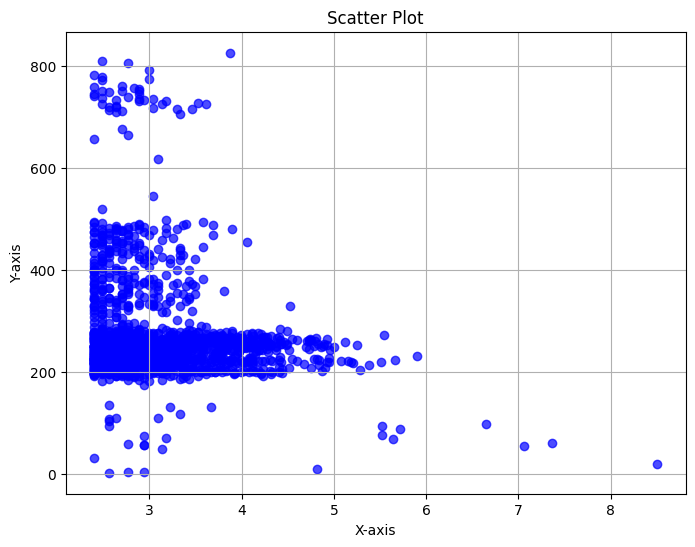

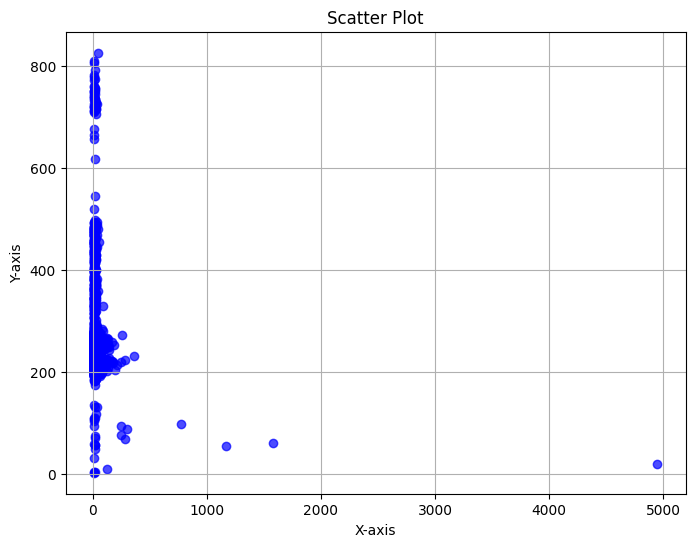

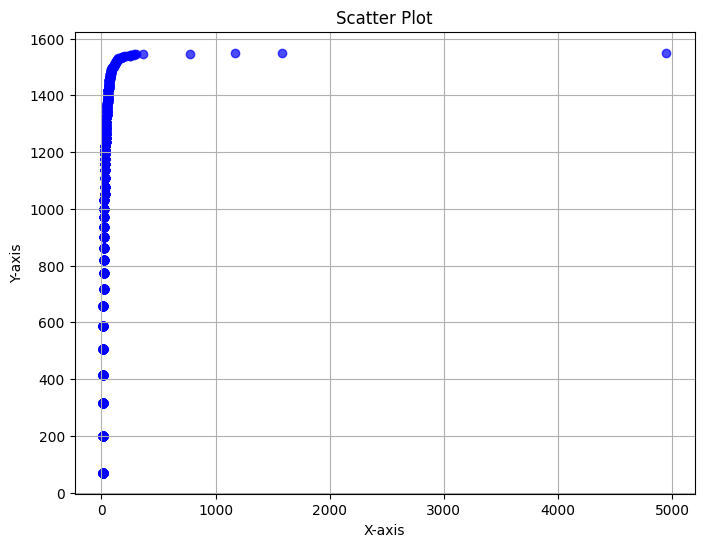

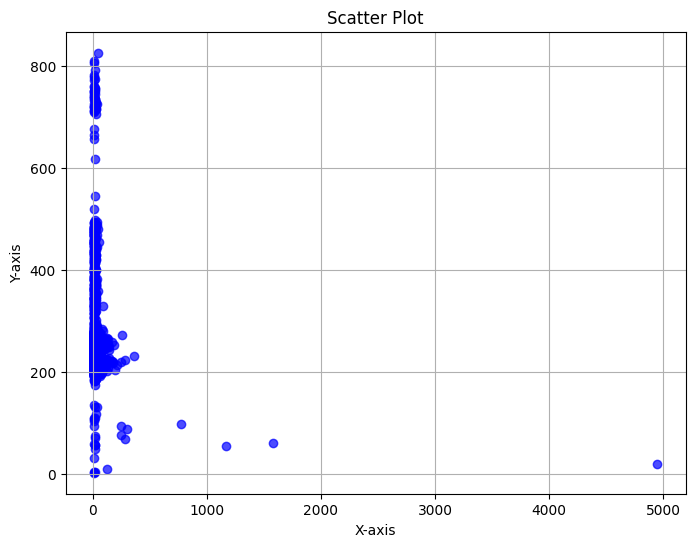

   transcript_id  cell_id  overlaps_nucleus feature_name  x_location  \
0              1       -1                 0            1  120.366669   
1              2       -1                 0            2  591.559998   
2              3       -1                 0            3  745.857117   
3              4       -1                 0            4  699.512817   
4              5       -1                 0            5  832.075012   

   y_location  z_location    qv  
0  253.100006    2.300000  40.0  
1  253.320007    2.120000  40.0  
2  253.857147    1.571429  40.0  
3  262.000000    2.589744  40.0  
4  261.299988    2.025000  40.0  
Found  1550  final puncta!


In [22]:
# Puncta counting in python
puncta = tiff.imread(puncta_file)
labeled_image = label(puncta)
regions = regionprops(labeled_image)

print('Found ', len(regions), ' puncta')

# Print out properties for each region
for i, region in enumerate(regions[0:9]):
    print(f'  Region {i + 1}:')
    print(f'  Label: {region.label}')
    print(f'  Area: {region.area}')
    print(f'  Centroid: {region.centroid}')
    print(f'  Bounding Box: {region.bbox}')
    # print(f'  Eccentricity: {region.eccentricity}')
    # print(f'  Orientation: {region.orientation}')  
    print()

# histogram(pd.DataFrame([region.area for region in regions]), nbins = 100)

# Criteria: centroid in 250-300, volumn is reasonable ~(20 px X 20 px X 20 px)
puncta_metadata = pd.DataFrame({'puncta': [region.label for region in regions], 
                             'x': [region.centroid[2] for region in regions], 
                             'y': [region.centroid[1] for region in regions], 
                             'z': [region.centroid[0] for region in regions],
                             'volume': [region.area for region in regions]
                             })
puncta_metadata['rank'] = puncta_metadata['volume'].rank()


scatterplot(np.log(puncta_metadata['volume']), puncta_metadata['y'])
scatterplot(puncta_metadata['volume'], puncta_metadata['y'])
scatterplot(puncta_metadata['volume'], (puncta_metadata['rank']))
            
puncta_filt = puncta_metadata[puncta_metadata['volume'] > puncta_volume_min]
scatterplot(puncta_filt['volume'], puncta_filt['y'])

signal_df = puncta_filt.copy()
signal_df['transcript_id'] = signal_df['puncta']
signal_df['cell_id'] = -1
signal_df['overlaps_nucleus'] = 0
signal_df['feature_name'] = [str(i) for i in signal_df['puncta'].tolist()] #['signal_' + str(i) for i in list(range(1, signal_df.shape[0]+1))]
signal_df['x_location'] = signal_df['x']
signal_df['y_location'] = signal_df['y']
signal_df['z_location'] = signal_df['z']
signal_df['qv'] = 40
signal_df2 = signal_df.loc[:, ['transcript_id', 'cell_id', 'overlaps_nucleus', 'feature_name', 'x_location', 'y_location', 'z_location', 'qv']]
signal_df2 = signal_df2.astype({'transcript_id':np.uint64, 
                                'cell_id':np.int32, 
                                'overlaps_nucleus':np.uint8, 
                                'feature_name':object, 
                                'x_location':np.float32, 
                                'y_location':np.float32, 
                                'z_location':np.float32, 
                                'qv':np.float32})

# Save centroid data for puncta counting
signal_df2.to_parquet('signal.parquet', engine='pyarrow')
print(signal_df2.head())

# Save labeled image for inspection
labeled_image2 = np.zeros_like(labeled_image)
labeled_image2[np.isin(labeled_image, puncta_filt['puncta'])] = labeled_image[np.isin(labeled_image, puncta_filt['puncta'])]
tiff.imwrite(puncta_file, labeled_image2.astype('uint16'))

print("Found ", puncta_filt.shape[0], " final puncta!")

In [23]:
# Finds previously missing puncta that was likely too big
# puncta_filt[(puncta_filt['x'] > 235) & (puncta_filt['x'] < 250) & 
#           (puncta_filt['y'] > 235) & (puncta_filt['y'] < 270)]

In [24]:
# # Make parquet file
# import pandas as pd
# import numpy as np

# # Create a sample pandas DataFrame
# signal_df = pd.read_csv(puncta_stats_file)
# print(signal_df.head())

# # signal_df[['Volume (micron^3)']]
# histogram(signal_df['Volume (micron^3)'], nbins = 20)
# scatterplot(signal_df['Volume (micron^3)'], signal_df['Y'])

# signal_df['transcript_id'] = list(range(1, signal_df.shape[0]+1))
# signal_df['cell_id'] = -1
# signal_df['overlaps_nucleus'] = 0
# signal_df['feature_name'] = 'OPN1LW' #['signal_' + str(i) for i in list(range(1, signal_df.shape[0]+1))]
# signal_df['x_location'] = signal_df['X']
# signal_df['y_location'] = signal_df['Y']
# signal_df['z_location'] = signal_df['Z']
# signal_df['qv'] = 40
# signal_df.head()

# # Remove signal with volume less than this number
# signal_df = signal_df[signal_df['Volume (micron^3)'] > puncta_volume_min]

# # Should be: transcript_id  cell_id  overlaps_nucleus feature_name  x_location  y_location  z_location
# signal_df2 = signal_df.loc[:, ['transcript_id', 'cell_id', 'overlaps_nucleus', 'feature_name', 'x_location', 'y_location', 'z_location', 'qv']]
# signal_df2 = signal_df2.astype({'transcript_id':np.uint64, 
#                                 'cell_id':np.int32, 
#                                 'overlaps_nucleus':np.uint8, 
#                                 'feature_name':object, 
#                                 'x_location':np.float32, 
#                                 'y_location':np.float32, 
#                                 'z_location':np.float32, 
#                                 'qv':np.float32})

# # Write the DataFrame to a Parquet file
# signal_df2.to_parquet('signal.parquet', engine='pyarrow')
# # print(signal_df2.dtypes)
# # print(signal_df2.head())

# # Types should be: 
# # transcript_id        uint64
# # cell_id               int32
# # overlaps_nucleus      uint8
# # feature_name         object
# # x_location          float32
# # y_location          float32
# # z_location          float32
# # qv                  float32


In [25]:
!python map_transcripts.py --help

usage: map_transcripts.py [-h] -cellpose CELLPOSE -transcript TRANSCRIPT -out
                          OUT -pix_size PIX_SIZE [-nuc_exp NUC_EXP]
                          [-qv_cutoff QV_CUTOFF] [-rep_int REP_INT]

Map Xenium transcripts to Cellpose segmentation result. Generate
Seurat/Scanpy-compatible feature-cell matrix.

options:
  -h, --help            show this help message and exit
  -nuc_exp NUC_EXP      The expansion distance from the nuclear boundary, in
                        microns, for cell boundary. (default: 10.0)
  -qv_cutoff QV_CUTOFF  Ignore transcripts with QV score below this threshold.
                        (default: 20.0)
  -rep_int REP_INT      Reporting interval. Will print message to stdout
                        whenever the specified # of transcripts is processed.
                        (default: 10000)

required named arguments:
  -cellpose CELLPOSE    The path to the *.ome_seg.npy file produced by
                        Cellpose.
  -transcript TRANSC

In [26]:
# !source activate cellpose
!rm -r feature_cell_matrix
!python map_transcripts.py -cellpose "{mask_file}" -transcript signal.parquet -out feature_cell_matrix -pix_size 0.6210004 -nuc_exp {nuclear_expansion} -rep_int 50


0 transcripts processed.
50 transcripts processed.
100 transcripts processed.
150 transcripts processed.
200 transcripts processed.
250 transcripts processed.
300 transcripts processed.
350 transcripts processed.
400 transcripts processed.
450 transcripts processed.
500 transcripts processed.
550 transcripts processed.
600 transcripts processed.
650 transcripts processed.
700 transcripts processed.
750 transcripts processed.
800 transcripts processed.
850 transcripts processed.
900 transcripts processed.
950 transcripts processed.
1000 transcripts processed.
1050 transcripts processed.
1100 transcripts processed.
1150 transcripts processed.
1200 transcripts processed.
1250 transcripts processed.
1300 transcripts processed.
1350 transcripts processed.
1400 transcripts processed.
1450 transcripts processed.
1500 transcripts processed.


In [27]:
features = pd.read_csv('feature_cell_matrix/features.tsv.gz', delimiter='\t', compression='gzip', header = None)
features
# cell_associated_puncta = [barcodes[i] for i in np.where(matrix != 0)[1].tolist()]


,0,1,2
0,1,1,Gene Expression
1,10,10,Gene Expression
2,100,100,Gene Expression
3,1000,1000,Gene Expression
4,1001,1001,Gene Expression
...,...,...,...
1545,995,995,Gene Expression
1546,996,996,Gene Expression
1547,997,997,Gene Expression
1548,998,998,Gene Expression


In [28]:
import gzip
import numpy as np
from scipy.io import mmread
import pandas as pd

# Path to the gzipped .mtx file
file_path = 'feature_cell_matrix/matrix.mtx.gz'

# Read the gzipped Matrix Market file
with gzip.open(file_path, 'rb') as f:
    matrix = mmread(f).toarray()  # Convert to a NumPy array

print(matrix)

barcodes = [int(cell.split('_')[1]) for cell in pd.read_csv('feature_cell_matrix/barcodes.tsv.gz', delimiter='\t', compression='gzip', header = None).iloc[:,0]]

non_zero_count = np.count_nonzero(matrix)

print("Number of non-zero entries:", non_zero_count)
print(matrix.max())
print(matrix.shape)
barcodes[0:5]

# Check if results make sense
z_stack = tiff.imread(nuclei_file)
masks = tiff.imread(mask_file)

unique_values = np.unique(z_stack)
print("Unique values:", unique_values)

positive_cells = [barcodes[i] for i in np.where(matrix != 0)[1].tolist()]
positive_cells

positive_mask = np.zeros_like(masks)
positive_mask[np.isin(masks, positive_cells)] = 1
positive_mask

print("Unique values:", np.unique(positive_mask))


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Number of non-zero entries: 653
1
(1550, 5120)
Unique values: [    0    18    19 ... 65515 65516 65535]
Unique values: [0 1]


In [29]:
positive_cells

[57,
 119,
 154,
 3437,
 3269,
 3648,
 3648,
 4006,
 3268,
 3031,
 3657,
 3119,
 3679,
 3028,
 3646,
 3347,
 3194,
 3268,
 4008,
 3508,
 3098,
 3358,
 69,
 3299,
 3977,
 74,
 58,
 3791,
 143,
 93,
 4006,
 3861,
 2974,
 3583,
 3267,
 4017,
 3125,
 4349,
 133,
 3378,
 97,
 72,
 4067,
 3266,
 3792,
 3436,
 164,
 3646,
 3192,
 2505,
 3863,
 3726,
 3593,
 3733,
 3540,
 3972,
 3974,
 1341,
 2504,
 1034,
 1561,
 1337,
 3098,
 3273,
 3104,
 3724,
 3939,
 1099,
 4303,
 3608,
 4000,
 4127,
 73,
 4068,
 1561,
 2977,
 3646,
 3791,
 4009,
 1252,
 3273,
 4082,
 3816,
 3553,
 3759,
 4492,
 1035,
 3719,
 3782,
 1037,
 4068,
 3267,
 4067,
 3098,
 3792,
 3720,
 1401,
 2977,
 2786,
 4131,
 1561,
 3101,
 3932,
 3591,
 3368,
 70,
 2929,
 3678,
 92,
 170,
 3721,
 2621,
 3104,
 93,
 58,
 3937,
 4459,
 4216,
 3377,
 138,
 3974,
 4430,
 4649,
 174,
 199,
 4194,
 3647,
 2336,
 4146,
 4145,
 4556,
 3788,
 3268,
 3861,
 2977,
 4359,
 4593,
 3582,
 93,
 3788,
 123,
 3509,
 3721,
 121,
 3793,
 4777,
 4662,
 3271,
 

5120
  Region 1:
  Label: 1
  Area: 88.0
  Centroid: (2.4545454545454546, 3.8863636363636362, 105.9659090909091)
  Bounding Box: (0, 0, 103, 8, 9, 108)

  Region 2:
  Label: 2
  Area: 94.0
  Centroid: (2.425531914893617, 3.1702127659574466, 108.79787234042553)
  Bounding Box: (0, 0, 108, 7, 7, 112)

  Region 3:
  Label: 3
  Area: 599.0
  Centroid: (6.130217028380635, 5.67779632721202, 57.235392320534224)
  Bounding Box: (0, 0, 52, 12, 14, 65)

  Region 4:
  Label: 4
  Area: 79.0
  Centroid: (5.670886075949367, 2.9240506329113924, 63.29113924050633)
  Bounding Box: (0, 0, 61, 11, 7, 66)

  Region 5:
  Label: 5
  Area: 750.0
  Centroid: (6.06, 11.737333333333334, 64.252)
  Bounding Box: (0, 0, 54, 18, 21, 72)

  Region 6:
  Label: 6
  Area: 577.0
  Centroid: (4.902946273830156, 7.665511265164644, 93.40207972270363)
  Bounding Box: (0, 4, 82, 11, 12, 107)

  Region 7:
  Label: 7
  Area: 83.0
  Centroid: (5.819277108433735, 8.44578313253012, 59.602409638554214)
  Bounding Box: (0, 1, 54, 1

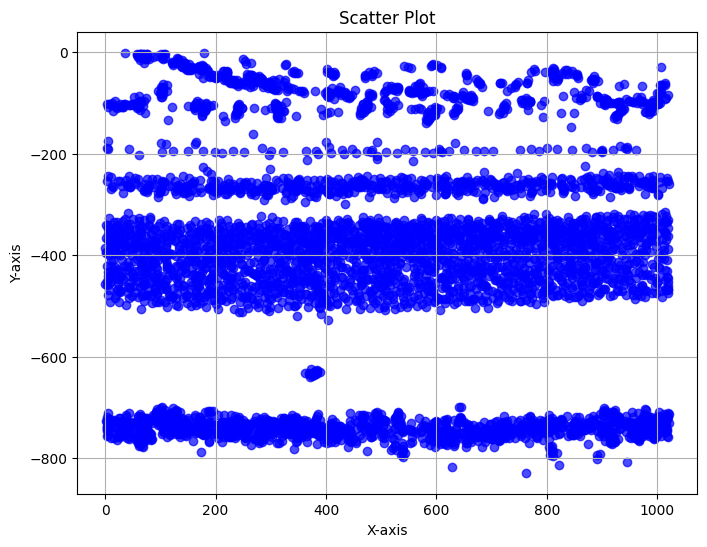

In [30]:
# Find all the centroids

# Measure the properties of the labeled regions
regions = regionprops(masks)
print(len(regions))

# Print out properties for each region
for i, region in enumerate(regions[0:9]):
    print(f'  Region {i + 1}:')
    print(f'  Label: {region.label}')
    print(f'  Area: {region.area}')
    print(f'  Centroid: {region.centroid}')
    print(f'  Bounding Box: {region.bbox}')
    # print(f'  Eccentricity: {region.eccentricity}')
    # print(f'  Orientation: {region.orientation}')  
    print()

# Scatterplot of centroids
scatterplot([region.centroid[2] for region in regions], [-region.centroid[1] for region in regions])

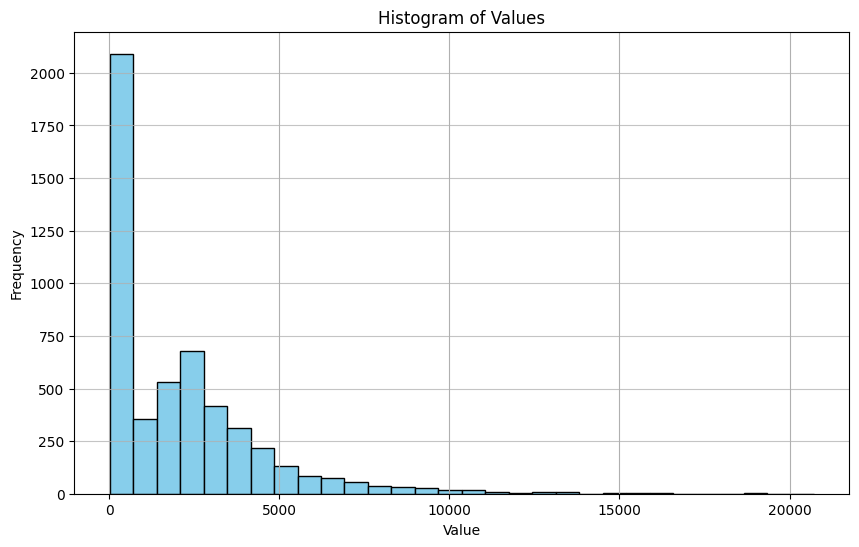

    cell           x          y          z  volume  positive    ONL    INL  \
7      8   74.147214  13.749247  13.739081  2656.0     False  False  False   
9     10  254.667556  22.223111   2.400889  1125.0     False  False  False   
13    14  158.659948  33.960988   6.507152  1538.0     False  False  False   
17    18  177.579389  50.608397   4.706107  1310.0     False  False  False   
21    22  170.247830  43.570245  21.289661  2534.0     False  False  False   

      GCL  
7   False  
9   False  
13  False  
17  False  
21  False  
Found  2864  total cells!
Found  325  cells in ONL!
Found  2006  cells in INL!
Found  433  cells in GCL!
Found  216  positive cells in ONL!
Found  130  positive cells in INL!
Found  15  positive cells in GCL!
Found  0.6646153846153846 % positive cells in ONL!
Found  0.06480558325024925 % positive cells in INL!
Found  0.03464203233256351 % positive cells in GCL!


In [31]:
# Photoreceptor selection based on size 

# Criteria: centroid in 250-300, volumn is reasonable ~(20 px X 20 px X 20 px)
cell_metadata = pd.DataFrame({'cell': [region.label for region in regions], 
                             'x': [region.centroid[2] for region in regions], 
                             'y': [region.centroid[1] for region in regions], 
                             'z': [region.centroid[0] for region in regions],
                             'volume': [region.area for region in regions],
                             'positive': [region.label in positive_cells for region in regions]
                             })

histogram(cell_metadata['volume'], nbins = 30)

good_cell_metadata = cell_metadata[(cell_metadata['volume'] > volume_min) & (cell_metadata['volume'] < volume_max)].copy()

# histogram(good_cell_metadata['volume'], nbins = 30)
# scatterplot(good_cell_metadata['x'], -good_cell_metadata['y'])
good_cell_metadata.loc[:, 'ONL'] = (good_cell_metadata['y'] < boundaries[1]) & (good_cell_metadata['y'] > boundaries[0])
good_cell_metadata.loc[:, 'INL'] = (good_cell_metadata['y'] < boundaries[2]) & (good_cell_metadata['y'] > boundaries[1])
good_cell_metadata.loc[:, 'GCL'] = (good_cell_metadata['y'] > boundaries[2])

# scatterplot(photoreceptor_metadata['x'], -photoreceptor_metadata['y'])
print(good_cell_metadata.head())
print("Found ", good_cell_metadata.shape[0], " total cells!")
print("Found ", good_cell_metadata['ONL'].sum(), " cells in ONL!")
print("Found ", good_cell_metadata['INL'].sum(), " cells in INL!")
print("Found ", good_cell_metadata['GCL'].sum(), " cells in GCL!")
print("Found ", (good_cell_metadata['ONL'] & good_cell_metadata['positive']).sum(), " positive cells in ONL!")
print("Found ", (good_cell_metadata['INL'] & good_cell_metadata['positive']).sum(), " positive cells in INL!")
print("Found ", (good_cell_metadata['GCL'] & good_cell_metadata['positive']).sum(), " positive cells in GCL!")
print("Found ", (good_cell_metadata['ONL'] & good_cell_metadata['positive']).sum()/good_cell_metadata['ONL'].sum(), "% positive cells in ONL!")
print("Found ", (good_cell_metadata['INL'] & good_cell_metadata['positive']).sum()/good_cell_metadata['INL'].sum(), "% positive cells in INL!")
print("Found ", (good_cell_metadata['GCL'] & good_cell_metadata['positive']).sum()/good_cell_metadata['GCL'].sum(), "% positive cells in GCL!")

good_cell_metadata.to_csv(summary_output_file)

In [ ]:
goodcell_mask = np.zeros_like(masks)
goodcell_cells = good_cell_metadata['cell'].to_list()
goodcell_mask[np.isin(masks, goodcell_cells)] = 1
check_masks(z_stack, goodcell_mask)
tiff.imwrite(path + '/' + prefix + '_filtered_cell_mask.tif', goodcell_mask.astype('uint16'))

In [ ]:
positive_mask = np.zeros_like(masks)
positive_cells = good_cell_metadata[good_cell_metadata['positive']]['cell'].to_list()
positive_mask[np.isin(masks, positive_cells)] = 1
check_masks(z_stack, positive_mask)
tiff.imwrite(path + '/' + prefix + '_positive_cell_mask.tif', positive_mask.astype('uint16'))

In [ ]:
photoreceptor_mask = np.zeros_like(masks)
photoreceptor_cells = good_cell_metadata[good_cell_metadata['ONL']]['cell']
photoreceptor_mask[np.isin(masks, photoreceptor_cells)] = 1
check_masks(z_stack, photoreceptor_mask)

In [ ]:
positive_pr_mask = np.zeros_like(masks)
positive_pr_cells = good_cell_metadata[good_cell_metadata['positive'] & good_cell_metadata['ONL']]['cell']
positive_pr_mask[np.isin(masks, positive_pr_cells)] = 1
print("Positive photoreceptors: ", len(positive_pr_cells))
check_masks(z_stack, positive_pr_mask)

In [ ]:
# # Trouble shooting false negative

# cell_id = 2976
# temp_mask = np.zeros_like(masks)
# temp_mask[np.isin(masks, cell_id)] = 1
# check_masks(z_stack, temp_mask)

In [ ]:
# # spot: 243, 255, 54
# import pandas as pd
# signal_df = pd.read_parquet('signal.parquet', engine='pyarrow')
# signal_df.head()

# signal_df[signal_df['transcript_id'] == 1200]

# signal_df[(signal_df['x_location'] > 235) & (signal_df['x_location'] < 250) & 
#           (signal_df['y_location'] > 235) & (signal_df['y_location'] < 270)]

In [ ]:
# Save multi-channel image result
nuclei = tiff.imread(nuclei_file)
puncta = tiff.imread(puncta_file)
positive = tiff.imread(path + '/' + prefix + '_positive_cell_mask.tif')

multi_channel_z_stack = np.stack([nuclei, puncta, positive], axis=-1)
multi_channel_z_stack.shape
tiff.imwrite(path + '/' + prefix + '_final_multichannel.tif', multi_channel_z_stack.astype('uint16'))

multi_channel_z_stack = np.stack([nuclei, masks, positive], axis=-1)
multi_channel_z_stack.shape
tiff.imwrite(path + '/' + prefix + '_masks_multichannel.tif', multi_channel_z_stack.astype('uint16'))

In [ ]:
print('Positive, filtered cells: ')
positive_cells

In [ ]:
# # spot: 320, 273, 41
# import pandas as pd
# signal_df = pd.read_parquet('signal.parquet', engine='pyarrow')
# signal_df.head()

# x_loc = 320
# y_loc = 273
# signal_df[(signal_df['x_location'] > (x_loc-10)) & (signal_df['x_location'] < (x_loc+10)) & 
#           (signal_df['y_location'] > (y_loc-10)) & (signal_df['y_location'] < (y_loc+10))]

In [ ]:
# puncta 4187 should be in cell 1509
mask_array = tiff.imread(mask_file)

# Read 5 columns from transcripts Parquet file
transcripts_df = pd.read_parquet('signal.parquet',
                                 columns=["feature_name",
                                          "x_location",
                                          "y_location",
                                          "z_location",
                                          "qv"])

transcripts_df = transcripts_df[transcripts_df['feature_name'] == '2099']
transcripts_df

In [ ]:
import re
# Find distinct set of features.
features = np.unique(transcripts_df["feature_name"])

# Create lookup dictionary
feature_to_index = dict()
for index, val in enumerate(features):
    # print(type(val))
    feature_to_index[val] = index
    # feature_to_index[str(val, 'utf-8')] = index

# Find distinct set of cells. Discard the first entry which is 0 (non-cell)
cells = np.unique(mask_array)[1:]

# Create a cells x features data frame, initialized with 0
matrix = pd.DataFrame(0, index=range(len(features)), columns=cells, dtype=np.int32)

m = re.match("\((?P<z_size>\d+), (?P<y_size>\d+), (?P<x_size>\d+)", str(mask_array.shape))
mask_dims = { key:int(m.groupdict()[key]) for key in m.groupdict() }

# Iterate through all transcripts
for index, row in transcripts_df.iterrows():

    feature = row['feature_name'] #str(row['feature_name'], 'utf-8')
    x = row['x_location']
    y = row['y_location']
    z = row['z_location']
    qv = row['qv']

    # Convert transcript locations from physical space to image space
    # Edit: locations are already in pixel coordinates
    x_pixel = x #/ args.pix_size
    y_pixel = y #/ args.pix_size
    z_slice = z #/ Z_SLICE_MICRON

    # Add guard rails to make sure lookup falls within image boundaries.
    x_pixel = min(max(0, x_pixel), mask_dims["x_size"] - 1)
    y_pixel = min(max(0, y_pixel), mask_dims["y_size"] - 1)
    z_slice = min(max(0, z_slice), mask_dims["z_size"] - 1)

    # Look up cell_id assigned by Cellpose. Array is in ZYX order.
    cell_id = mask_array[round(z_slice)] [round(y_pixel)] [round(x_pixel)]
    print(cell_id)

In [ ]:
# Volume of cell 1509
cell_metadata[cell_metadata['cell'] == 1337]

In [ ]:
# Puncta 3110